In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import bnlearn as bn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Base dataset
#train = pd.read_csv('data/healthcare/diabetes_train.csv',sep=';')
#test = pd.read_csv('data/healthcare/diabetes_test.csv',sep=';')

#Filled dataset, before binning
#train = pd.read_csv('data/healthcare/diabetesBayessianRegressed.csv',sep=';')
#train = pd.read_csv('data/healthcare/diabetesMean.csv',sep=';')

#Filled dataset, after binning
#train = pd.read_csv('data/healthcare/diabetesKnowledgeBinnedBayeReg.csv',sep=';')
train = pd.read_csv('data/healthcare/diabetesKnowledgeBinnedBayeReg_NEW_KEYS.csv',sep=';')
#train = pd.read_csv('data/healthcare/diabetesKnowledgeBinnedMean.csv',sep=';')

In [3]:
def get_columns(dfs:pd.DataFrame, label:str, frange:tuple, product:int=1, const:int=0):
    krok = product    
    for x in range(frange[0],frange[1],frange[2]):
        left = x*product+const
        right = (x+1)*product+const
        dfs[label+'('+ str(left) + ','+str(right)+')'] = (dfs[label]>=left) & (dfs[label]<right)
    dfs.drop(labels=label,axis=1,inplace=True)

In [4]:
#get_columns(dfs = train, frange = (2,8,1), label = 'Age', product = 10,const=0 )
#get_columns(dfs = train, frange = (0,15,0), label = 'Age', product = 10,const=0 )

In [5]:
#Old imputer, currently not needed, as dataset is already imputted
# from sklearn.impute import SimpleImputer
# rep_0 = SimpleImputer(missing_values=0, strategy="mean")
# cols = train.columns
# #train_miss = train.pop(('SkinThickness','BloodPressure','Insuline','BMI','Glukose'))
# test_preg = test[('Pregnancies')].copy()
# train_preg = train[('Pregnancies')].copy()
# test_out = test[('Outcome')].copy()
# train_out = train['Outcome'].copy()

# train = pd.DataFrame(rep_0.fit_transform(train))
# test = pd.DataFrame(rep_0.fit_transform(test))
# train.columns = cols
# test.columns = cols
# print(cols)
# #train = pd.concat([train, train_col], axis='columns')
# #test = pd.concat([test, test_col], axis='columns')
# train['Pregnancies'] = train_preg
# test['Pregnancies'] = test_preg
# train['Outcome'] = train_out
# test['Outcome'] = test_out
# train.head(10)

In [6]:
#Data describing functions
train.describe()
train.info()
#print(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   Insulin                   768 non-null    int64
 4   BMI                       768 non-null    int64
 5   DiabetesPedigreeFunction  768 non-null    int64
 6   Age                       768 non-null    int64
 7   Outcome                   768 non-null    int64
dtypes: int64(8)
memory usage: 48.1 KB


In [7]:
# Data preparing with onehotencoding

# df_datahot_train, df_train = bn.df2onehot(train,y_min = 10)
# dfhot_test, df_test = bn.df2onehot(test,y_min = 10)

In [8]:
#Model basic design
# edges = ([
#     ('Pregnancies', 'Outcome'),
#     ('Glucose', 'Outcome'),
#     ('BloodPressure', 'Outcome'),
#     ('Insulin', 'Outcome'),
#     ('BMI', 'Outcome'),
#     ('DiabetesPedigreeFunction', 'Outcome'),
#     ('Age', 'Outcome')
# ])
# edges = ([
#     ('Outcome','Pregnancies'),
#     ('Outcome','Glucose'),
#     ('Outcome','BloodPressure'),
#     ('Outcome','Insulin'),
#     ('Outcome','BMI'),
#     ('Outcome','DiabetesPedigreeFunction'),
#     ('Outcome','Age')
# ])

In [9]:
# Prepare columns name with continous data to discretize
continuous_columns = ["Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction"]

# Discretize the continous columns by specifying
# df_train = bn.discretize(train, edges, continuous_columns, max_iterations=1)
#train.drop(columns="BloodPressure")
df_train = train


In [10]:
#Separate target from prepared dataset
#df_target = df_train.pop('Outcome')
# #Use scipy to split dataset on training and 
# Xtrain, Xval, Ztrain, Zval = train_test_split(df_train, df_target, test_size=0.2, random_state=0)

#df_valid = pd.concat([Xval, Zval], axis='columns')
# df_data = pd.concat([Xtrain, Ztrain], axis='columns')
# df_data

In [11]:
#Splitting data
df_data,df_valid = train_test_split(df_train,  test_size=0.2, random_state=0)
df_data

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
603,2,2,1,2,4,3,1,1
118,2,1,1,1,3,2,1,0
247,0,2,4,3,4,2,1,0
157,1,1,1,2,3,4,1,0
468,2,1,1,1,4,1,1,1
...,...,...,...,...,...,...,...,...
763,2,1,1,3,4,1,2,0
192,2,2,1,1,4,2,1,1
629,2,1,1,1,2,1,1,0
559,2,1,1,1,4,2,1,0


In [12]:
#Get_score
def get_acc(model, df, col):
    # Get accuracy score by the model for the validation dataset df with target col
    pred = bn.predict(model, df, variables=[col])
    print(pred)
    acc = accuracy_score(df[col], pred[col])
    print('Accuracy -', acc)
    return acc

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


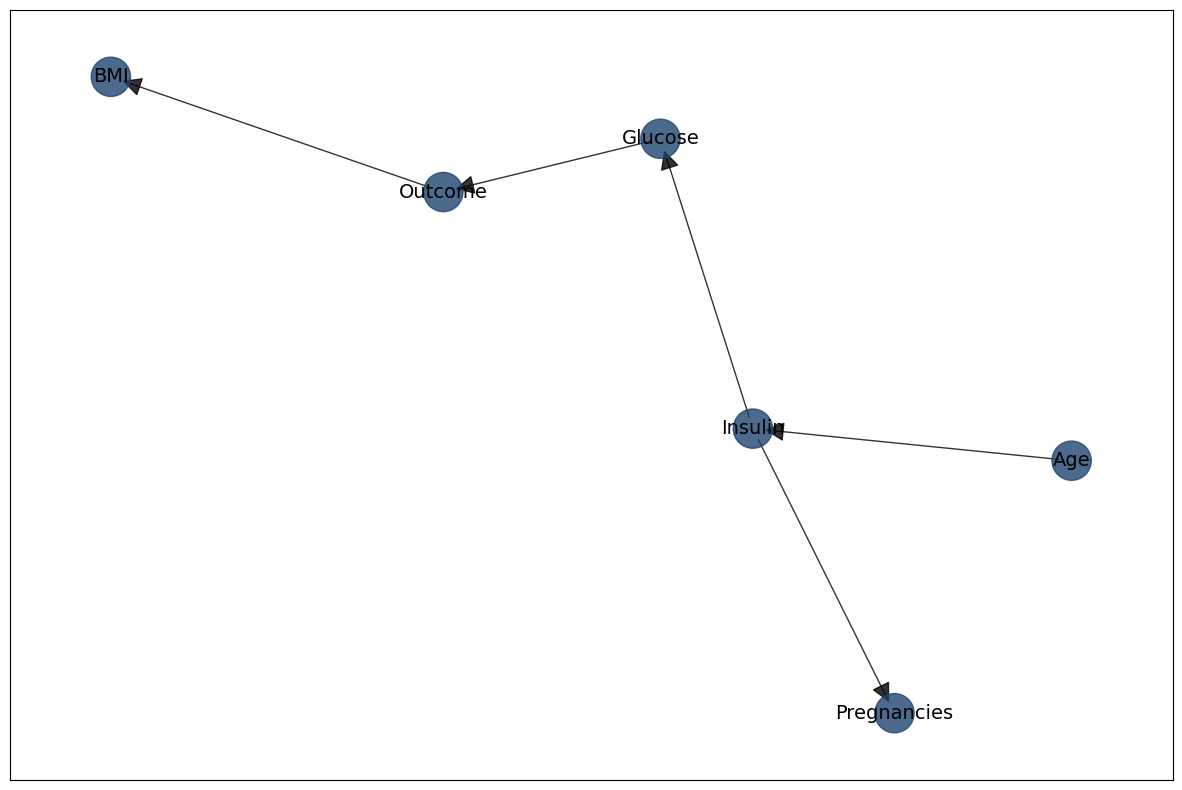

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Glucose:
+------------+--------------------+--------------------+---------------------+
| Insulin    | Insulin(1)         | Insulin(2)         | Insulin(3)          |
+------------+--------------------+--------------------+---------------------+
| Glucose(1) | 0.6159957627118644 | 0.6355255070682237 | 0.49886963074604374 |
+------------+--------------------+--------------------+---------------------+
| Glucose(2) | 0.3840042372881356 | 0.3644744929317763 | 0.5011303692539563  |
+------------+--------------------+--------------------+---------------------+
[bnlearn] >CPD of Outcome:
+------------+-------------------+---------------------+
| Glucose    | Glucose(1)        | Glucose(2)          |
+------------+-------------------+---------------------+
| Outcome(0) | 0.62119622245

In [13]:
# Structure learning
DAG = bn.structure_learning.fit(df_data, methodtype='hc', root_node='Outcome', verbose=5)
#Plot DAG -> directed acyclic graph
G = bn.plot(DAG)
#Create model based on earlier structere and parameter learning
model = bn.parameter_learning.fit(DAG, df_data, verbose=5)

#DAG = bn.structure_learning.fit(df_data, methodtype='hc', root_node='BMI', verbose=5)
#DAG = bn.structure_learning.fit(df_data, methodtype='hc', verbose=5)

In [14]:
#model = bn.structure_learning.fit(df_data, methodtype='ex', scoretype='bic')
# Compute edge strength using chi-square independence test and remove (prune) the not-signficant edges
#model = bn.independence_test(model, df_data, alpha=0.05, prune=True)

In [15]:
#Get information about generated model
model

{'model': <pgmpy.models.BayesianNetwork.BayesianNetwork at 0x228e5656110>,
 'adjmat': target                    Pregnancies  Glucose  BloodPressure  Insulin    BMI  \
 source                                                                          
 Pregnancies                     False    False          False    False  False   
 Glucose                         False    False          False    False  False   
 BloodPressure                   False    False          False    False  False   
 Insulin                          True     True          False    False  False   
 BMI                             False    False          False    False  False   
 DiabetesPedigreeFunction        False    False          False    False  False   
 Age                             False    False          False     True  False   
 Outcome                         False    False          False    False   True   
 
 target                    DiabetesPedigreeFunction    Age  Outcome  
 source                

In [16]:
# Get score of the model1
#acc1 = get_acc(model, df_valid, 'Outcome')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


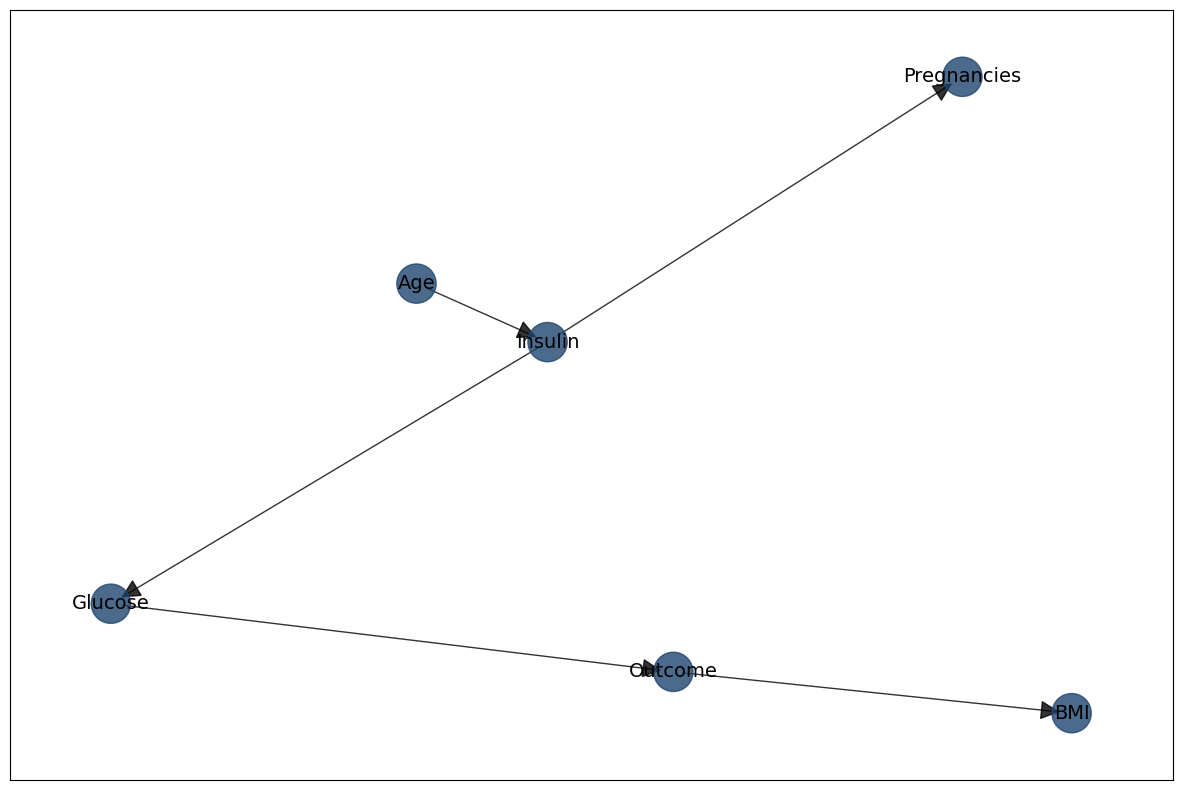

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Glucose:
+------------+--------------------+--------------------+---------------------+
| Insulin    | Insulin(1)         | Insulin(2)         | Insulin(3)          |
+------------+--------------------+--------------------+---------------------+
| Glucose(1) | 0.6159957627118644 | 0.6355255070682237 | 0.49886963074604374 |
+------------+--------------------+--------------------+---------------------+
| Glucose(2) | 0.3840042372881356 | 0.3644744929317763 | 0.5011303692539563  |
+------------+--------------------+--------------------+---------------------+
[bnlearn] >CPD of Outcome:
+------------+-------------------+---------------------+
| Glucose    | Glucose(1)        | Glucose(2)          |
+------------+-------------------+---------------------+
| Outcome(0) | 0.62119622245

In [17]:
%%time
# Structure learning
DAG2 = bn.structure_learning.fit(df_data, methodtype='ex', root_node='Outcome', bw_list_method='nodes', verbose=4)

# Plot
G2 = bn.plot(DAG2)

# Parameter learning
model2 = bn.parameter_learning.fit(DAG2, df_data, verbose=4)

In [18]:
# Score of the model2
#acc2 = get_acc(model, df_valid, 'Outcome')

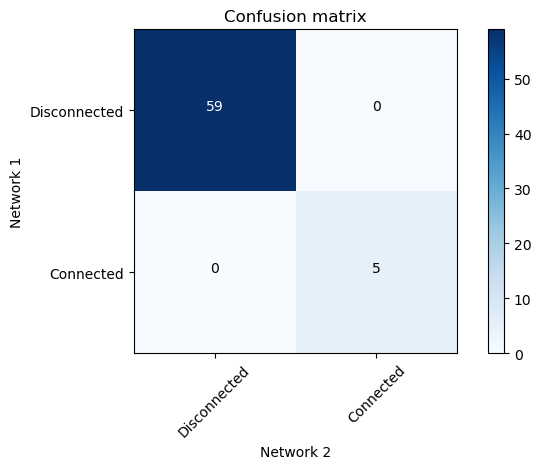

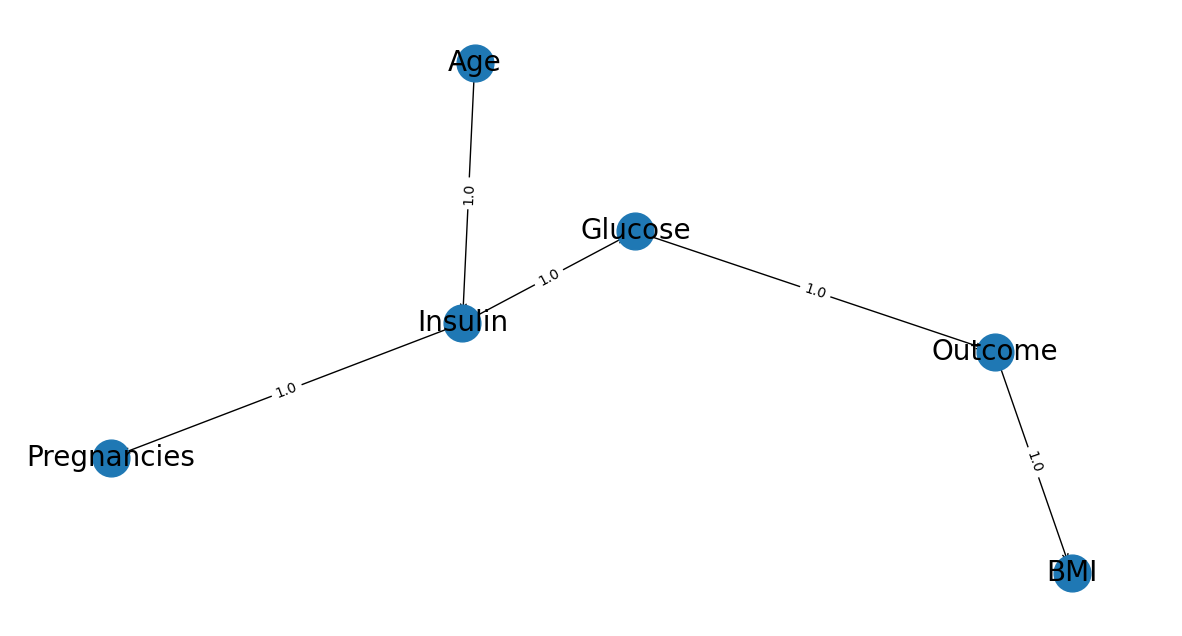

Coincidence - 1.0


In [19]:
# Models comparing
res = bn.bnlearn.compare_networks(model, model2, figsize=(15, 8), verbose=3)
print('Coincidence -', (res[0][0, 0] + res[0][1, 1])/res[0].sum())

In [20]:
df_train

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,2,1,1,4,3,1,1
1,1,1,1,1,3,2,1,0
2,2,2,1,1,2,3,1,1
3,1,1,1,2,3,1,1,0
4,0,1,1,3,4,5,1,1
...,...,...,...,...,...,...,...,...
763,2,1,1,3,4,1,2,0
764,1,1,1,1,4,2,1,0
765,2,1,1,2,3,2,1,0
766,1,1,1,1,4,2,1,1


In [21]:
%%time
# Make inferences
query = bn.inference.fit(model, variables=['Outcome'], evidence={'BMI':2},verbose=5)
print(query)
print(query.df)

q1 = bn.inference.fit(model, variables=['Outcome'], evidence={'BMI':3})
print(query)
print(query.df)

# Print model
bn.print_CPD(model)

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-----------+----------+
|    |   Outcome |        p |
+====+===========+==========+
|  0 |         0 | 0.608955 |
+----+-----------+----------+
|  1 |         1 | 0.391045 |
+----+-----------+----------+
+------------+----------------+
| Outcome    |   phi(Outcome) |
+============+================+
| Outcome(0) |         0.6090 |
+------------+----------------+
| Outcome(1) |         0.3910 |
+------------+----------------+
   Outcome         p
0        0  0.608955
1        1  0.391045
[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-----------+---------+
|    |   Outcome |       p |
+====+===========+=========+
|  0 |         0 | 0.58961 |
+----+-----------+---------+
|  1 |         1 | 0.41039 |
+----+-----------+---------+
+------------+----------------+
| Outcome    |   phi(Outcome) |
+============+================+
| Outcome(0) |         0.6090 |
+------------+----------

{'Glucose':    Glucose  Insulin         p
 0        1        1  0.615996
 1        1        2  0.635526
 2        1        3  0.498870
 3        2        1  0.384004
 4        2        2  0.364474
 5        2        3  0.501130,
 'Outcome':    Outcome  Glucose         p
 0        0        1  0.621196
 1        0        2  0.455371
 2        1        1  0.378804
 3        1        2  0.544629,
 'Insulin':    Insulin  Age         p
 0        1    1  0.415252
 1        1    2  0.376966
 2        1    3  0.336307
 3        2    1  0.352153
 4        2    2  0.299495
 5        2    3  0.333333
 6        3    1  0.232595
 7        3    2  0.323538
 8        3    3  0.330360,
 'Pregnancies':    Pregnancies  Insulin         p
 0            0        1  0.251236
 1            0        2  0.262036
 2            0        3  0.289626
 3            1        1  0.267126
 4            1        2  0.370826
 5            1        3  0.337101
 6            2        1  0.481638
 7            2        2  0

In [22]:
# # Prediction using the Bayesian network
#Pout = bn.predict(model, df=df_valid, variables=['Outcome'])
#Pout